# <span style='color:blue'>1-Import libraries

In [1]:
#This just for ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#Load data-preprocessing libraries
import pandas as pd
import numpy as np

#Text processing libraries
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords  
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 
from sklearn.feature_extraction.text import TfidfVectorizer #feature extraction
from spacy.lang.en import English
import emoji

#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#evaluation metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <span style='color:blue'>2-Load the dataset

In [2]:
#Load the dataset
TrainData=pd.read_csv('Data/twitter_training.csv')
TestData=pd.read_csv('Data/twitter_validation.csv')

In [3]:
#columns rename
TrainData.columns=['Id','Topic','Sentiment','Tweet']
TestData.columns=['Id','Topic','Sentiment','Tweet']

In [19]:
TrainData.head()

,Id,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
TrainData.shape

(74681, 4)

# <span style='color:blue'>3-NaN and duplicated data

In [5]:
TrainData.isnull().sum()

Id             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [6]:
print('Number of duplicated row: ',TrainData.duplicated().sum())

Number of duplicated row:  2700


In [7]:
#Drop NaN data
TrainData.dropna(axis=0,inplace=True)
TrainData.isnull().sum()

Id           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

In [8]:
#Drop duplicated data
TrainData=TrainData.drop_duplicates()
print('Number of duplicated row: ',TrainData.duplicated().sum())

Number of duplicated row:  0


# <span style='color:blue'>4-Exploratory data analysis

### 4.1-To determine which keywords were used in each label, we will use word_cloud to see which words are the most important in the train data.

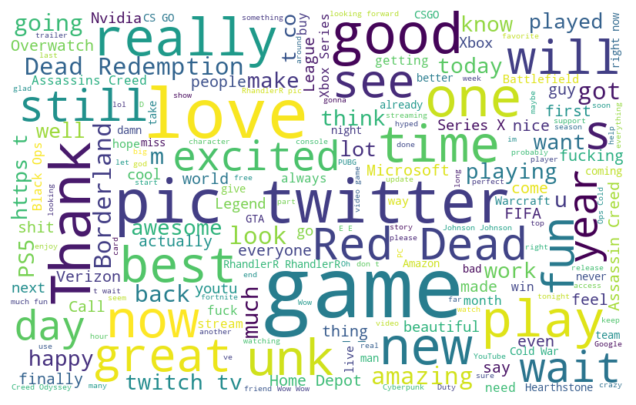

================ Positive ================
 The number of words in our file are:  358523
 The number of unique words in our file are:  26803


In [21]:
all_words = ' '.join([i for i in TrainData['Tweet'][TrainData['Sentiment']=='Positive']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()
print('================ Positive ================')
# Number of words in Our file
print (" The number of words in our file are: ",len((all_words.split(" "))))
print (" The number of unique words in our file are: ",len(set(all_words.split(" "))))

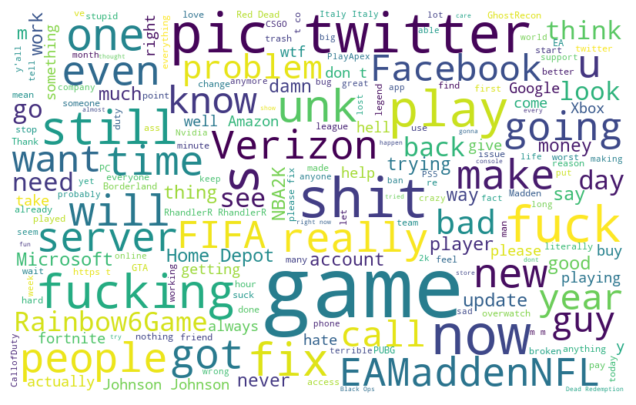

================ Negative ================
 The number of words in our file are:  450990
 The number of unique words in our file are:  28618


In [20]:
all_words = ' '.join([i for i in TrainData['Tweet'][TrainData['Sentiment']=='Negative']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()
print('================ Negative ================')
# Number of words in Our file
print (" The number of words in our file are: ",len((all_words.split(" "))))
print (" The number of unique words in our file are: ",len(set(all_words.split(" "))))

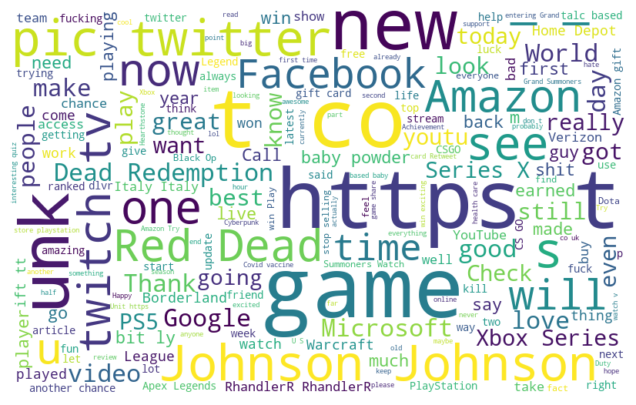

================ Neutral ================
 The number of words in our file are:  371180
 The number of unique words in our file are:  36612


In [22]:
all_words = ' '.join([i for i in TrainData['Tweet'][TrainData['Sentiment']=='Neutral']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()
print('================ Neutral ================')
# Number of words in Our file
print (" The number of words in our file are: ",len((all_words.split(" "))))
print (" The number of unique words in our file are: ",len(set(all_words.split(" "))))

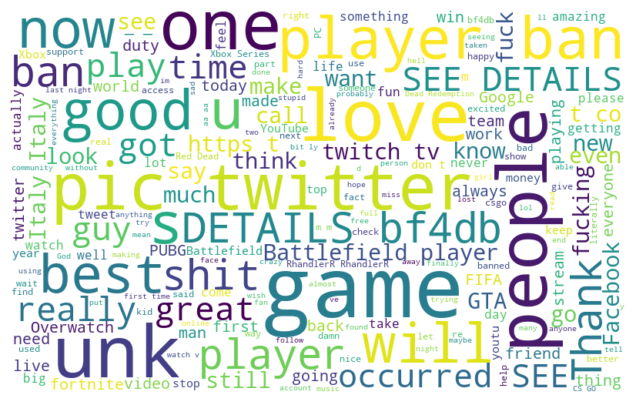

================ Irrelevant ================
 The number of words in our file are:  255293
 The number of unique words in our file are:  24251


In [25]:
all_words = ' '.join([i for i in TrainData['Tweet'][TrainData['Sentiment']=='Irrelevant']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()
print('================ Irrelevant ================')
# Number of words in Our file
print (" The number of words in our file are: ",len((all_words.split(" "))))
print (" The number of unique words in our file are: ",len(set(all_words.split(" "))))

<span style='color:green'>Note: We can see a clear difference between emotinal and neutral topics. In "Positive" top we can see some positive words, like love, good, best, great. In "Negative", instead, we observe lots of swear words. In neutral categories words with positive connotation are also observed, but not so frequent. To sum up, distribution of top-frequent words is different across target categories.

### 4.2-Count Topic per Sentiment

Text(0.5, 1.0, 'Distribution of tweets per Topic and Sentiment')

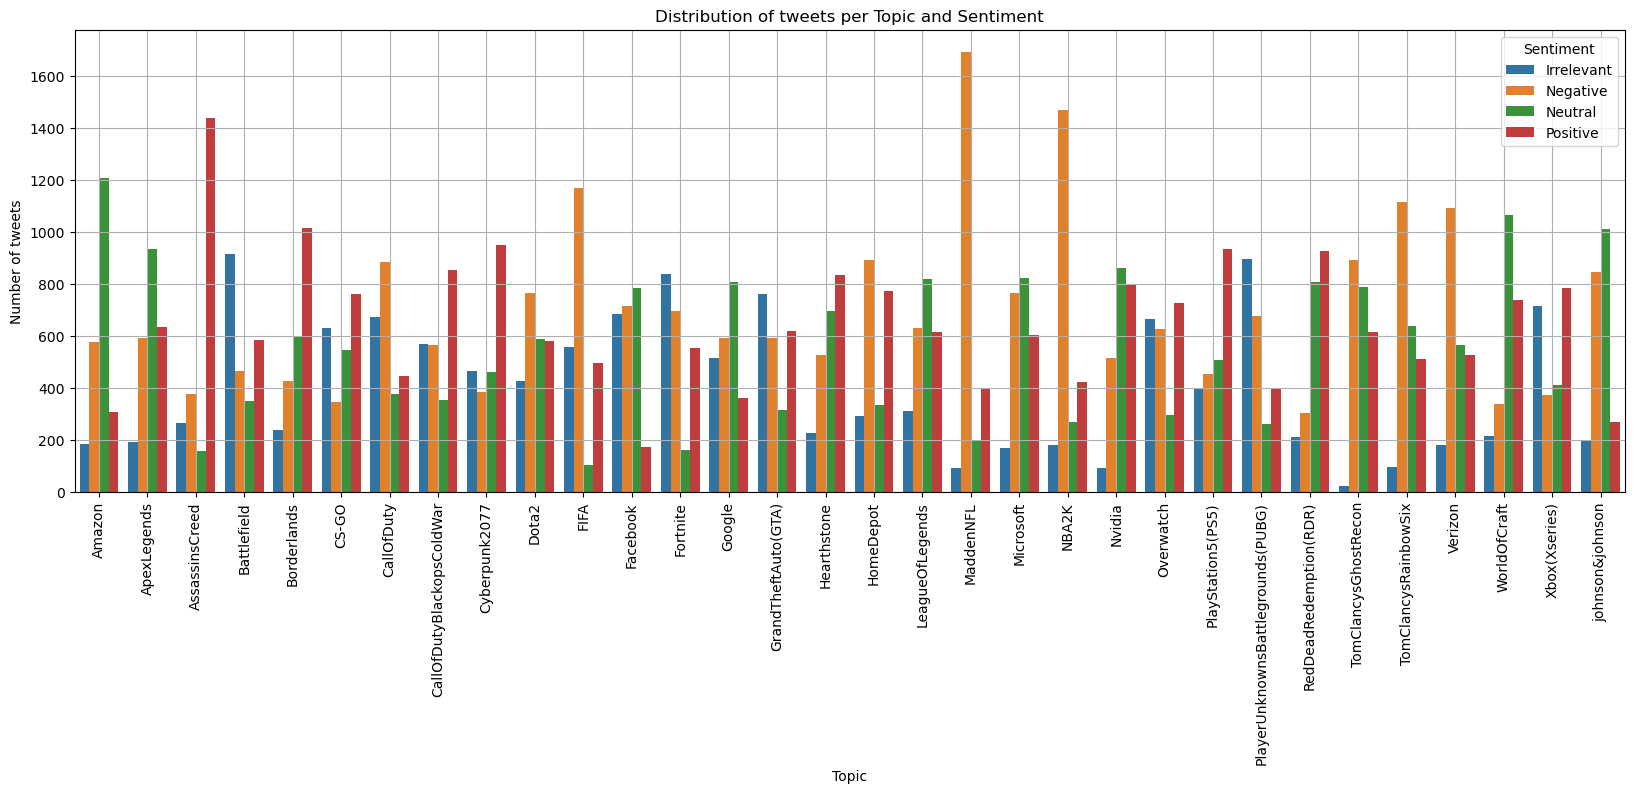

In [29]:
plot1=TrainData.groupby(by=["Topic","Sentiment"]).count().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Topic",y="Id",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Topic")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Topic and Sentiment")

### 4.3-Target Analysis

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

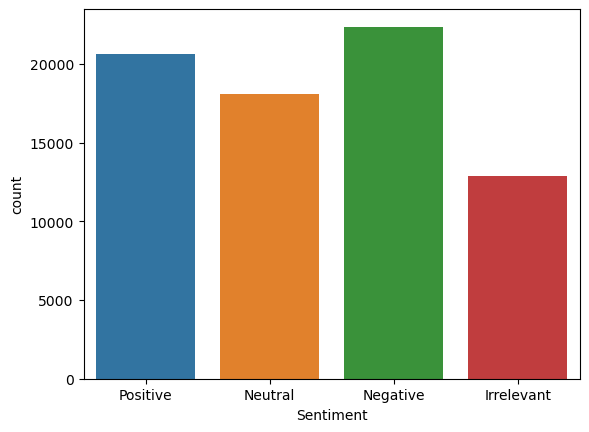

In [51]:
#Check the balance of target
sns.countplot(x=TrainData['Sentiment'])

<span style="color:Green">Note: Target are almost of equal size, so resampling is not required.

# <span style='color:blue'>3-Outliers

In [25]:
# Calculate the length of each tweet.
text_lens = [len(t.split()) for t in TrainData['Tweet']]
len_mean = np.mean(text_lens)

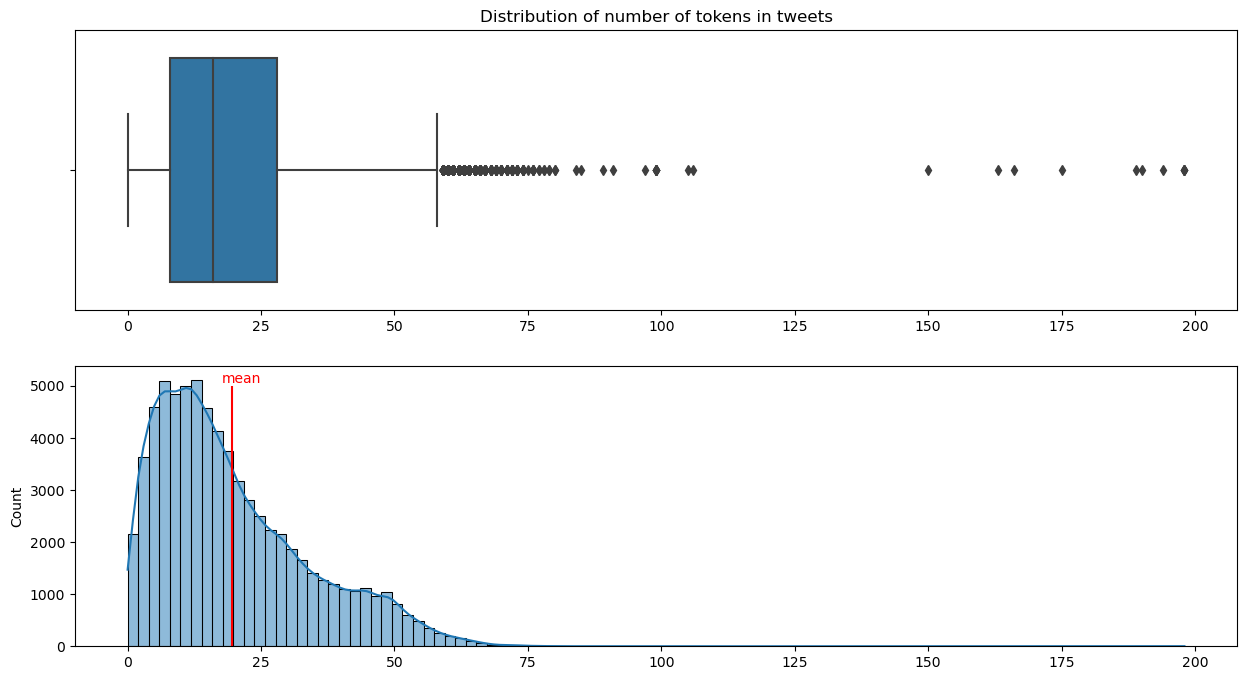

In [26]:
#Box plot and hist plot to show the outliers.
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(text_lens, ax=axes[0])
sns.histplot(text_lens, bins=100, kde=True, ax=axes[1])
axes[1].vlines(len_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

<span style='color:green'>Note: Mean length of tweets is nearly 23 tokens. The distribution is scewed positively and a few outliers are observed on the right tail. Some of them are clode to the right whisker but some are located far from the majority of points. Let investigate them!

In [27]:
extreme_outliers = TrainData['Tweet'][np.array(text_lens) > 125]
for i in extreme_outliers.index:
    print(extreme_outliers[i])
    print('================='*7)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

<span style='color:green'>Note: Some of these tweets do not contain any textual information. Such precendents could be removed. Some have both meaningful part and plenty of punctuation characters. They could be removed on the preprocessing stage.

# <span style='color:blue'>4-Preprocess Text

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase.

Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Someone" to "USER")

Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.

Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

Removing Short Words: Words with length less than 2 are removed.

Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [9]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [10]:
def preprocess(textdata):
    processedText = []
    
    # stemming and lemmatization function
    wordLemm = WordNetLemmatizer()
    ps = PorterStemmer()
    # Defining regex patterns
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    doubleSpacePattern= re.compile(' +')


    
    for tweet in textdata:
        tweet = tweet.lower()
    
        # Removing double space
        tweet=re.sub(doubleSpacePattern, ' ', tweet)
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        
        # Replace all emojis.
        tweet = emoji.demojize(tweet, language='en')
        for emojii in emojis.keys():
            tweet = tweet.replace(emojii, "EMOJI" + emojis[emojii])
            
        # Replace @USERNAME to 'USER'
        tweet = re.sub(userPattern,' USER', tweet) 
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword
            if word in stop_words:
                continue
            
            # Checkinglength less than 2
            if len(word)>2:
                # Lemmatizing and stemming the word
                word = wordLemm.lemmatize(word)
                word=ps.stem(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText
        



In [11]:
#Train Data
TrainText, TrainSentiment = TrainData['Tweet'],TrainData['Sentiment']
TrainProcessedtext = preprocess(TrainText)
print('Train Text Preprocessing complete.')

Train Text Preprocessing complete.


In [12]:
#TestData'
TestText, TestSentiment = TestData['Tweet'],TestData['Sentiment']
TestProcessedtext = preprocess(TestText)
print('Train Text Preprocessing complete.')

Train Text Preprocessing complete.


# <span style='color:blue'>5-Feature extraction

In [13]:
#TF-IDF Vectoriser
vectoriser = TfidfVectorizer(max_features=18000)
vectoriser.fit(TrainProcessedtext)
print('Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  18000


In [14]:
TrainProcessedtext = vectoriser.transform(TrainProcessedtext)
TestProcessedtext = vectoriser.transform(TestProcessedtext)
print('Data Transformed')

Data Transformed


# <span style='color:blue'>6-spliting the data

In [15]:
#Target encoding
TrainSentiment=pd.Series(TrainSentiment).replace(('Irrelevant', 'Negative', 'Neutral', 'Positive'),(0,1,2,3))
TestSentiment=pd.Series(TestSentiment).replace(('Irrelevant', 'Negative', 'Neutral', 'Positive'),(0,1,2,3))

In [16]:
X_train=TrainProcessedtext
X_test=TestProcessedtext
y_train=TrainSentiment
y_test=TestSentiment
print('Data Split done.')

Data Split done.


# <span style='color:blue'>7-modeling 

### 7.1-XGBoost model

In [17]:
#XGBoost model
model = xgb.XGBClassifier()
#Fit the model to the training data
model.fit(X_train, y_train)

#Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy:  0.7427427427427428
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       171
           1       0.65      0.90      0.75       266
           2       0.81      0.69      0.75       285
           3       0.77      0.77      0.77       277

    accuracy                           0.74       999
   macro avg       0.77      0.73      0.73       999
weighted avg       0.76      0.74      0.74       999



### 7.2-Logistic regression model

In [18]:
#Logistic regression model
logistic_regression = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)

#Fit the model to the training data
logistic_regression.fit(X_train, y_train)

#Use the trained model to make predictions on the testing data
y_pred = logistic_regression.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy:  0.8318318318318318
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       171
           1       0.79      0.89      0.84       266
           2       0.89      0.79      0.84       285
           3       0.82      0.87      0.84       277

    accuracy                           0.83       999
   macro avg       0.84      0.82      0.83       999
weighted avg       0.84      0.83      0.83       999



### 7.3-Random forest model

In [19]:
#Random forest model
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy:  0.9409409409409409
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       171
           1       0.94      0.95      0.94       266
           2       0.94      0.93      0.94       285
           3       0.95      0.95      0.95       277

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



### 7.4-Decision tree model

In [20]:
#Decision tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = decision_tree.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: ", accuracy)
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy:  0.8568568568568569
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       171
           1       0.84      0.91      0.88       266
           2       0.87      0.85      0.86       285
           3       0.88      0.83      0.85       277

    accuracy                           0.86       999
   macro avg       0.85      0.85      0.85       999
weighted avg       0.86      0.86      0.86       999



### 7.5-K nearest neighbor model

In [21]:
#K nearest neighbor model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the accuracy score
print("Accuracy:", knn.score(X_test, y_test))
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.944944944944945
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       171
           1       0.96      0.92      0.94       266
           2       0.91      0.98      0.94       285
           3       0.95      0.92      0.94       277

    accuracy                           0.94       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.94      0.95       999



### 7.6-Naive Bayes model

In [22]:
nb_XTrain=X_train.toarray()
nbX_test=X_test.toarray()

In [23]:
# Naive Bayes model
nb = GaussianNB()
# Train the Naive Bayes classifier using the training data
nb.fit(nb_XTrain, y_train)

# Make predictions on the test data
y_pred = nb.predict(nbX_test)

# Print the accuracy score
print("Accuracy:", nb.score(nbX_test, y_test))
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.6806806806806807
              precision    recall  f1-score   support

           0       0.42      0.96      0.59       171
           1       0.80      0.58      0.67       266
           2       0.96      0.68      0.79       285
           3       0.78      0.61      0.69       277

    accuracy                           0.68       999
   macro avg       0.74      0.71      0.68       999
weighted avg       0.78      0.68      0.70       999



# <span style='color:blue'>8-Evaluation

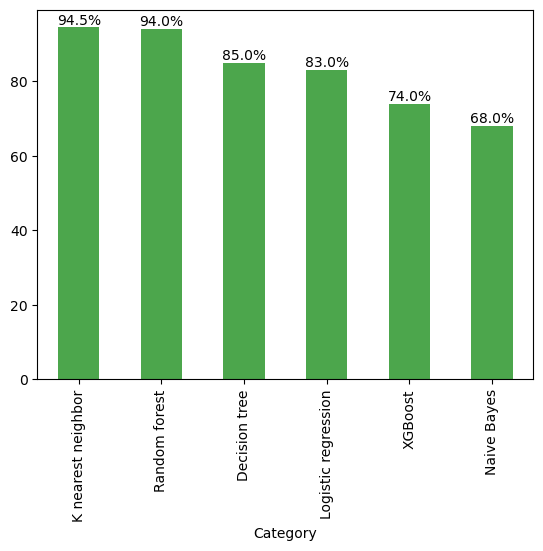

In [53]:
data = {'Category': ['K nearest neighbor','Random forest','Decision tree','Logistic regression','XGBoost','Naive Bayes'],
        'Count': [ 94.5, 94, 85, 83, 74, 68]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar chart
ax = df.plot.bar(x='Category', y='Count', legend=False,color='green',alpha=0.7)

# Add percentages above the bars
for p in ax.patches:
    percentage = f'{p.get_height()}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Display the chart
plt.show()

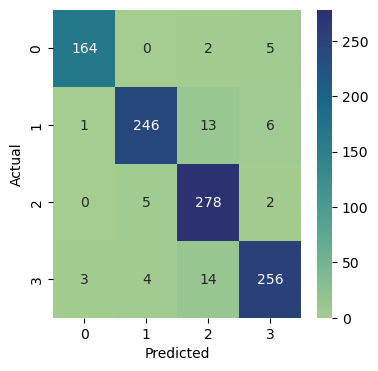

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       171
           1       0.96      0.92      0.94       266
           2       0.91      0.98      0.94       285
           3       0.95      0.92      0.94       277

    accuracy                           0.94       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.94      0.95       999



In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(cm, annot = True, cmap = "crest", fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification report 
cr = classification_report(y_test, y_pred)
print(cr)

# <span style='color:blue'>9-Fast API

In [54]:
import joblib
import uvicorn
from uvicorn import Config, Server
from fastapi import FastAPI
import os
from os.path import dirname, join, realpath
import webbrowser

In [55]:
def API_preprocess(tweet):
    
    
    # stemming and lemmatization function
    wordLemm = WordNetLemmatizer()
    ps = PorterStemmer()
    # Defining regex patterns
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    doubleSpacePattern= re.compile(' +')


    

    tweet = tweet.lower()
    
    # Removing double space
    tweet=re.sub(doubleSpacePattern, ' ', tweet)
        
    # Replace all URls with 'URL'
    tweet = re.sub(urlPattern,' URL',tweet)
        
    # Replace all emojis.
    tweet = emoji.demojize(tweet, language='en')
    for emojii in emojis.keys():
        tweet = tweet.replace(emojii, "EMOJI" + emojis[emojii])
            
    # Replace @USERNAME to 'USER'
    tweet = re.sub(userPattern,' USER', tweet) 
        
    # Replace all non alphabets.
    tweet = re.sub(alphaPattern, " ", tweet)
        
    # Replace 3 or more consecutive letters by 2 letter
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    tweetwords = ''
    for word in tweet.split():
        # Checking if the word is a stopword
        if word in stop_words:
            continue
            
        # Checkinglength less than 2
        if len(word)>2:
            # Lemmatizing the word
            word = wordLemm.lemmatize(word)
            word=ps.stem(word)
            tweetwords += (word+' ')
            
        
    return tweetwords

In [21]:
#save model 
joblib.dump(knn, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [56]:
#Initialize the FastAPI app
app = FastAPI(
    title="Sentiment analysis Model API",
    description="A simple API that use NLP model to predict the sentiment of the Tweets",
    version="0.1")

In [57]:
# load the sentiment model
with open(
    join(dirname(realpath('sentiment_model.pkl')), "sentiment_model.pkl"), "rb"
) as f:
    model = joblib.load(f)

In [58]:
@app.get("/predict-review")
def predict_sentiment(Tweet: str):
    """
    A simple function that receive a review content and predict the sentiment of the content.
    :param review:
    :return: prediction
    """
    # clean the review
    cleaned_Tweet = API_preprocess(Tweet)
    sparseMatrix=vectoriser.transform([cleaned_Tweet])
    # perform prediction
    prediction = model.predict(sparseMatrix)
    output = int(prediction[0])
    # output dictionary
    sentiments = {0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    
    # show results
    result = {"prediction": sentiments[output]}
    return result

In [59]:
config = Config(app)
server = Server(config=config)
webbrowser.open('http://127.0.0.1:8000/docs')
await server.serve()


INFO:     Started server process [15876]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62205 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:62205 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [15876]
